In [ ]:
import pandas as pd
import seaborn as sns

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

In [ ]:
print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


## PreProcessing

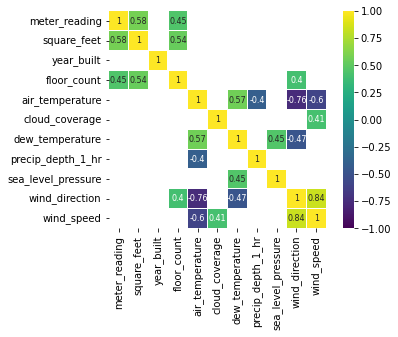

In [ ]:
sns.heatmap(df.corr()[(df.corr() >= 0.4) | (df.corr() <= -0.4)],
# sns.heatmap(df.corr(),
 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
df.describe()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
mean,185.383188,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433
max,5072.323426,875000.000000,2017.000000,26.000000,24.963702,5.671785,17.379328,11.675633,1018.052063,207.134076,5.493939


In [ ]:
df.isna().sum()

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64

In [ ]:
df.primary_use.unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

### Menghapus Kolom
Berdasarkan keterangan data, variabel floor count memiliki missing value sebanyak 1061 dan variabel year_built memiliki missing value sebanyak 750, sehingga kami memutuskan untuk menghapus kedua variabel tersebut. Selain itu, kami menganggap kedua variabel kurang dapat menjelaskan penggunaan listrik, terlebih floor count sudah dijelaskan dengan lebih baik dari nilai square_feet


In [ ]:
df.drop(columns=["floor_count","year_built"],axis=1,inplace=True)

Isi null dengan median untuk missing value

### Mengimputasi Kolom
Terlihat bahwa masih ada beberapa kolom yang memiliki missing values. Maka dari itu kami akan melakukan imputasi dengan nilai median. Hal ini kami lakukan dikarenakan terdapat beberapa outlier dalam data, sehingga akan lebih baik digunakkan median.

In [ ]:
df = df.fillna(df.median())

<ipython-input-12-a187aa03e3ee>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [ ]:
df.isnull().sum()

meter_reading         0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [ ]:
# sns.pairplot(data=df,hue="primary_use")

In [ ]:
import math

In [ ]:
df.iloc[1]["square_feet"]

2720

### Interaksi Sudut Angin dengan Kecepatan Angin
Ingin kita lihat apakah Pengaruh arah angin jika berinteraksi dengan kecepatan angin, akan memberikan nilai yang dapat kita gunakan ketika dilihat terhadap latitude maupun longitude

In [ ]:
lists = []
for i in range(len(df)) :
  detes = df.iloc[i]
  lists.append(detes["wind_speed"]*math.cos(-1*detes["wind_direction"]))
df["wind_speed_long"] = lists

In [ ]:
lists = []
for i in range(len(df)) :
  detes = df.iloc[i]
  lists.append(detes["wind_speed"]*math.sin(-1*detes["wind_direction"]))
df["wind_speed_lat"] = lists

In [ ]:
df["primary_use"] = df["primary_use"].astype("category")

In [ ]:
df.dtypes

meter_reading          float64
primary_use           category
square_feet              int64
air_temperature        float64
cloud_coverage         float64
dew_temperature        float64
precip_depth_1_hr      float64
sea_level_pressure     float64
wind_direction         float64
wind_speed             float64
wind_speed_long        float64
wind_speed_lat         float64
dtype: object

## EDA

### Melihat gedung dengan kebutuhan energi terbesar


In [ ]:
df["primary_use"].value_counts()
rata_rata = df["meter_reading"].groupby(df["primary_use"]).mean()
print(rata_rata)

primary_use
Education                        266.690745
Entertainment/public assembly    123.170221
Food sales and service            96.372528
Healthcare                       309.476976
Lodging/residential              128.541808
Manufacturing/industrial          89.383883
Office                           170.117480
Other                             89.251035
Parking                           72.326071
Public services                   99.870828
Religious worship                  4.762342
Retail                           209.889978
Services                          93.846495
Technology/science               114.000695
Utility                          161.868339
Warehouse/storage                 50.796869
Name: meter_reading, dtype: float64


Dapat dilihat berdasarkan rata-rata penggunaan listrik dalam kwh, didapatkan gedung dengan kategori Healthcare menggunakan listrik yang paling besar, padahal jika dilihat dari jumlah gedung tiap kategori, kategori Healthcare hanya memiliki 21 gedung. Hal ini menunjukkan bahwa gedung dengan kategori Healthcare menggunakan listrik yang besar sehingga akan mengeluarkan dana yang besar. Faktor memungkinkan yang dapat menyebabkan terjadinya hal ini, yaitu karena Healthcare cenderung memiliki banyak ruangan, seperti kamar rawat inap, ruang periksa, ruang operasi, dan lainnya sehingga menyebabkan kebutuhan listrik yang semakin besar. Hal ini dapat diatasi salah satunya dengan penggunaan lampu sensor, sehingga jika tidak ada orang yang berada di suatu ruangan, maka lampu akan otomatis mati.


### Heatmap

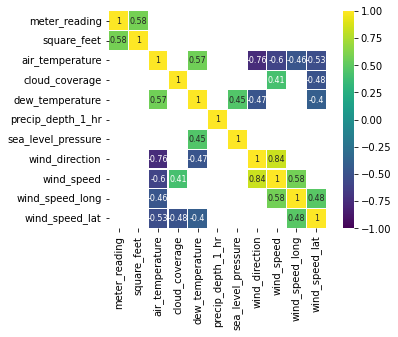

In [ ]:
sns.heatmap(df.corr()[(df.corr() >= 0.4) | (df.corr() <= -0.4)],
# sns.heatmap(df.corr(),
 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True);

Didapatkan bahwa korelasi positif tertinggi yakni sebesar 0.84 yakni antara variabel wind_direction dan wind_speed, hal ini menunjukkan adanya korelasi linier positif yang sangat kuat antara kedua variabel. Artinya arah angin akan mempengaruhi kecepatan angin, begitu juga sebaliknya. Ada kecenderungan bahwa wind_direction tinggi lebih berkorelasi dengan wind_speed tinggi dibandingkan dengan wind_speed rendah.

Didapatkan bahwa korelasi negatif tertinggi yakni sebesar -0.76 yakni antara variabel wind_direction dan air_temperature, hal ini menunjukkan adanya korelasi linier negatif yang kuat antara kedua variabel. Artinya arah angin akan mempengaruhi suhu udara, begitu juga sebaliknya. Ada kecenderungan bahwa wind_direction tinggi lebih berkaitan dengan air_temperatur yang lebih rendah dibandingkan air_temperature tinggi.

### Countplot

Ingin dilihat Jumlah Bangunan berdasarkan Kegunaannya

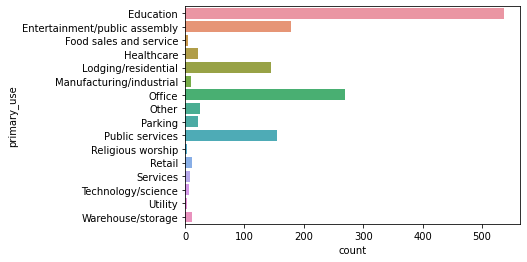

In [ ]:
sns.countplot(data=df,y="primary_use")

Dapat dilihat bahwa mayoritas kegunaan utama suatu bangunan adalah education, dengan office di posisi kedua, entertainment/public service di posisi ketiga, dan public services di posisi keempat.

### Boxplot


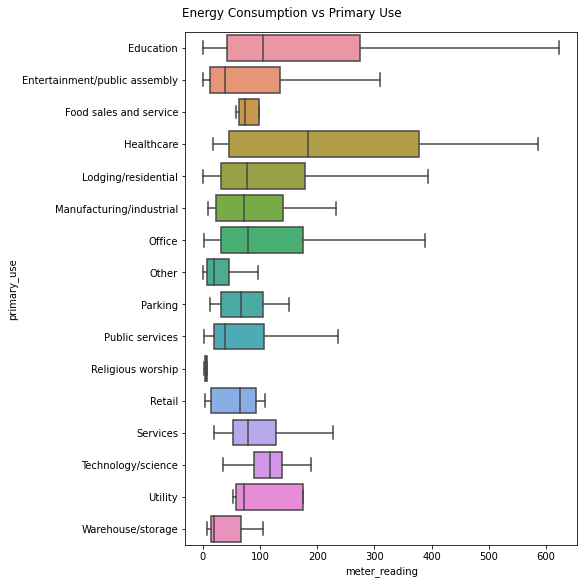

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8),constrained_layout=True)
fig.suptitle('Energy Consumption vs Primary Use')
# sns.boxplot(ax=axes[0], y='primary_use', x='meter_reading', data=df, showfliers=True)
sns.boxplot(ax=axes, y='primary_use', x='meter_reading', data=df, showfliers=False)

Dari boxplot berikut dapat dilihat bahwa kategori utama yang paling menggunakan energi adalah Healthcare dengan Education di posisi kedua.

### ScatterPlot Square Feet terhadap Meter Reading

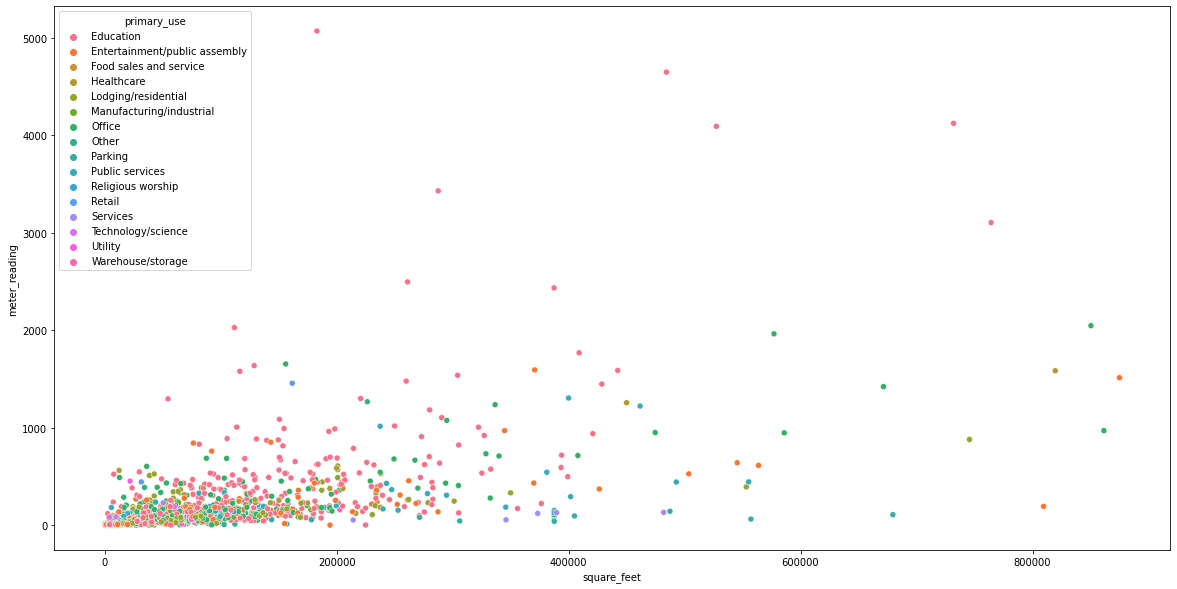

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(x=df['square_feet'],y=df['meter_reading'],hue=df["primary_use"])

Terlihat pola persebaran antara Luas Bangunan terhadap Penggunaan listrik yang cukup signifikan pengaruhnya

### Histogram WindSpeed dengan melihat Wind directionnya

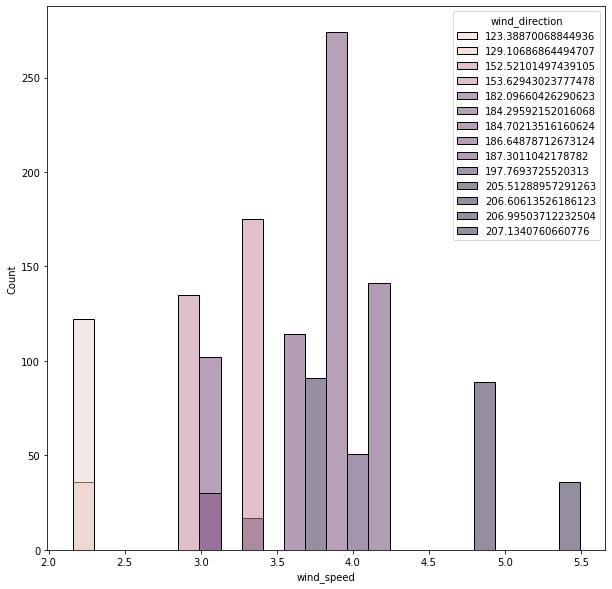

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))

sns.histplot(data=df,x="wind_speed",hue="wind_direction")

Terlihat hubungan yang cukup jelas antara jumlah wind_speed dengan wind_direction

### Histplot air temperature


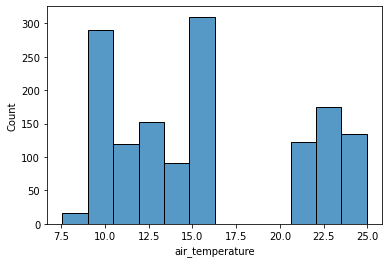

In [ ]:
sns.histplot(data=df,x="air_temperature")

Didapatkan bahwa suhu udara 15.502518 derajat celcius dimiliki oleh sebagian besar kategori.

### Histplot dew temperature


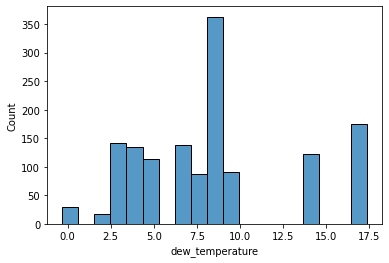

In [ ]:
sns.histplot(data=df,x="dew_temperature")

Didapatkan bahwa kelembaban 8.285693 derajat celcius dimiliki oleh sebagian besar kategori.

### Histplot cloud coverage


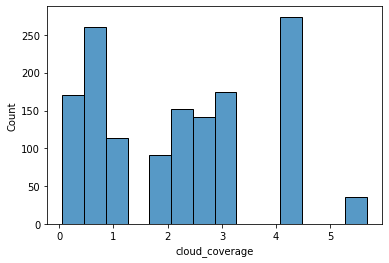

In [ ]:
sns.histplot(data=df,x="cloud_coverage")

Didapatkan bahwa suhu udara 4.079235 oktaf dimiliki oleh sebagian besar kategori.


In [ ]:
df.cloud_coverage.unique()

array([2.99872748, 0.05926623, 2.08371163, 4.07923534, 1.84457582,
       0.38835402, 0.68108879, 0.59239634, 0.33895771, 5.67178518,
       2.77878719, 0.66583213, 1.0921006 ])

dilakukan scaling untuk menghilangkan Pengaruh skala

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
df[['cloud_coverage',	'precip_depth_1_hr',	'sea_level_pressure',	'wind_speed']] = scaler.fit_transform(df[['cloud_coverage'	,	'precip_depth_1_hr',	'sea_level_pressure',	'wind_speed']])

df.head()

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,wind_speed_long,wind_speed_lat
0,237.749127,Education,7432,22.744816,0.573634,17.379328,0.06426,0.785193,152.521015,-0.234778,-0.519458,-3.351454
1,118.553743,Education,2720,22.744816,0.573634,17.379328,0.06426,0.785193,152.521015,-0.234778,-0.519458,-3.351454
2,23.626500,Education,5376,22.744816,0.573634,17.379328,0.06426,0.785193,152.521015,-0.234778,-0.519458,-3.351454
3,382.736016,Education,23685,22.744816,0.573634,17.379328,0.06426,0.785193,152.521015,-0.234778,-0.519458,-3.351454
4,1579.174237,Education,116607,22.744816,0.573634,17.379328,0.06426,0.785193,152.521015,-0.234778,-0.519458,-3.351454


## Permodelan

In [ ]:
mod = smf.ols("meter_reading~C(primary_use)-1 + square_feet +	air_temperature +	cloud_coverage +	dew_temperature +	precip_depth_1_hr +	sea_level_pressure +	wind_direction +	wind_speed +	wind_speed_lat +	wind_speed_long ",data=df).fit()

In [ ]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     55.40
Date:                Fri, 13 Jan 2023   Prob (F-statistic):          3.69e-188
Time:                        10:59:00   Log-Likelihood:                -9889.6
No. Observations:                1413   AIC:                         1.983e+04
Df Residuals:                    1387   BIC:                         1.997e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Didapatkan bahwa dari model bahwa kategori Primary use berpengaruh secara signifikan. Variabel-variabel lain yang signifikan merupakan square_feet, air_temperature, cloud_coverage, precip_depth_1_hr, dan wind_direction.


Primary use = Indikator kategori utama kegiatan bangunan berdasarkan definisi tipe properti EnergyStar

square_feet =  luas lantai bangunan tentu mempengaruhi konsumsi energi dikarenakan semakin besar suatu rumah maka semakin banyak peralatan yang dimiliki suatu rumah yang berdampak pada energi

air_temperature = semakin panas cuacanya maka orang cenderung menyalakan AC atau elektronik lain untuk mendinginkan ruangan

cloud_coverage = semakin banyak awan orang makin cenderung tinggal di rumah karena akan hujan

precip_depth_1_hr = semakin tinggi nilai presipitasinya (semakin sering hujan), maka sama dengan cloud_coverage, orang akan lebih cenderung tinggal dirumah

wind_direction = arah angin


## Kesimpulan

Beberapa interpertasi yang dapat diambil adalah bahwa:
* Cukup intuitif untuk melihat bahwa alasan square_feet signifikan terhadap konsumsi energi karena semakin besar suatu rumah maka semakin banyak orang yang tinggal di rumah itu atau peralatan yang dimiliki suatu rumah yang berdampak pada konsumsi energi
* Sebuah asumsi yang dapat kita lakukan untuk dijadikan alasan mengapa air_temperature merupakan pengaruh signifikan terhadap konsumsi energi adalah dikarenakan semakin panas cuaca maka orang akan cenderung menyalakan AC atau elektronik lain untuk mendinginkan ruangan.
* Terlihat dari Air Temperature + Precip Depth Temperature + Cloud Coverage, karena ketiga nilai memiliki pengaruh yang signifikan secara positif, kita bisa duga bahwa daerah dengan suhu yang tinggi, dengan kelembaban udara yang lembab, dan sering hujan memiliki pengaruh yang signifikan terhadap penggunaan energi, hal ini menarik untuk dilihat bahwa daerah di Khatulistiwa atau daerah dengan Hutan Hujan memiliki kondisi yang sesuai, sehingga dapat menjadi daerah yang menjadi fokus pengembangan industri bagi PT Ashrae Energy
Kami menyarankan daerah :
  * Indonesia
  * Peru
  * Malaysia

  Dengan jenis bangunan yang paling menarik untuk menjadi fokus :
  * Healthcare
  * Food Sales & Services
  * Education

  Lokasi Bangunan tersebut akan lebih baik dengan menjauhi daerah pegunungan atau daerah pantai karena daerah tersebut merupakan daerah berangin, hal ini dikarenakan terdapat korelasi negatif antara wind speed terhadap air temperature, maka kami menyarankan lokasi sebagai berikut :
  * Dataran Rendah
  * Sekitar Sungai (Hindari Muara / Hulu)
  * Danau

  Maka berdasarkan nilai Wind_speed_lat, kita ingin mencari daerah dengan arah angin yang lebih kearah Timur, dan dari nilai Wind_speed_long, kita cari daerah dengan arah angin ke Selatan. Maka kembali, dengan pengetahuan arah angin, dapat kita cari daerah paling optimal, yaitu daerah selatan khatulistiwa bagian Westerlies.

  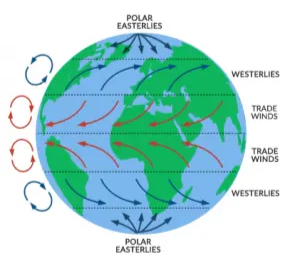